In this project we would focus on developing a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so we need to use the textual features of the movie stories and create predictive models. There are totally three different files used in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Only use this file after developing their predictive models and selecting their best final model. Then use best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

<h1 align='Left' style="color: black;">Loading the dataset:</h1>

Reading the data file and viewing the content to help us effectively plan and perform our task.

In [1]:
# importing required libraries
import pandas as pd

In [3]:
# reading & create dataframes for every csv file
evaldf = pd.read_csv('./movie_story_evaluation_file.csv')
studentdf = pd.read_csv('./movie_story_student_file.csv')
moviedf = pd.read_csv('./movies.csv')

# Displays file info and top & last rows for all the csv file
print('------------------------------------------movie_story_evaluation_file----------------------------------')
print(evaldf.head)
print(evaldf.info())
print('------------------------------------------movie_story_student_file-------------------------------------')
print(studentdf.head)
print(studentdf.info())
print('--------------------------------------------------movies-----------------------------------------------')
print(moviedf.head)
print(moviedf.info())

------------------------------------------movie_story_evaluation_file----------------------------------
<bound method NDFrame.head of       movie_id                                              story
0       122349  Growing up in the Mission district of San Fran...
1       122351  A soldier returns home from the Iraq war only ...
2       122361  Marco the Monkey works as a beach officer. But...
3       187901  When an honest cop, Vijay Kumar\'s family is r...
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...
...        ...                                                ...
3493    131062  In the middle of nowhere, 20 years after an ap...
3494    131064  After living for years as a struggling artist ...
3495    131066  Ronal is a young barbarian with low self-estee...
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...
3497    131070  During their childhood, Hanna and Clarissa wer...

[3498 rows x 2 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex

<h1 align='Left' style="color: black;">Data Preprocessing:</h1>

Eliminating any duplicates, null values, missing values from the movie_story_student_file & movie dataset. Also, checking the overall count of Drama and No Drama genre movies in it after merging both the datasets.

In [4]:
# count the movie genre with no genres listed
moviedf['genres'].value_counts()['(no genres listed)']

1310

In [5]:
#function to determine whether a movie is Drama or not and if not return its genre as No Drama
def find_genre(text):
    text = text.lower()
    if 'drama' in text:
        return 'Drama'
    else:
        return 'No Drama'

moviedf['genres'].apply(find_genre)

0        No Drama
1           Drama
2           Drama
3           Drama
4           Drama
           ...   
23493    No Drama
23494    No Drama
23495    No Drama
23496       Drama
23497       Drama
Name: genres, Length: 23498, dtype: object

In [6]:
moviedf['Drama_genre'] = moviedf['genres'].apply(find_genre)

In [7]:
# count the movie genre, and display number of drama genre versus number of no drama
moviedf['Drama_genre'].value_counts()

No Drama    13663
Drama        9835
Name: Drama_genre, dtype: int64

In [8]:
# merged two datasets using left merge, and dropped unwanted columns
merge_df = moviedf.merge(studentdf, left_on = 'movieId', right_on = 'movie_id')
merge_df.info()
merge_df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieId      20000 non-null  int64 
 1   title        20000 non-null  object
 2   genres       20000 non-null  object
 3   Drama_genre  20000 non-null  object
 4   movie_id     20000 non-null  int64 
 5   story        20000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


Index(['movieId', 'title', 'genres', 'Drama_genre', 'movie_id', 'story'], dtype='object')

In [9]:
merge_df

,movieId,title,genres,Drama_genre,movie_id,story
0,27509,Carolina (2005),Comedy|Romance,No Drama,27509,A young woman escapes her wildly eccentric fam...
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,Drama,27618,When a hunter sent back to the prehistoric era...
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller,Drama,27788,A military veteran goes on a journey into the ...
3,27821,"Interpreter, The (2005)",Drama|Thriller,Drama,27821,"After Silvia Broome, an interpreter at United ..."
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller,Drama,27839,Rachel Keller must prevent evil Samara from ta...
...,...,...,...,...,...,...
19995,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed),No Drama,209051,Comedian Jeff Garlin (unintentionally) celebra...
19996,209085,The Mistletoe Secret (2019),Romance,No Drama,209085,Aria Eubank convinces a famous travel writer t...
19997,209133,The Riot and the Dance (2018),(no genres listed),No Drama,209133,"This nature/science documentary, showcases the..."
19998,209157,We (2018),Drama,Drama,209157,During a scorching summer in a Belgian-Dutch b...


<h1 align='Left' style="color: black;">Transforming Drama genre as 1 & Non-Drama as 0:</h1>

From the merged dataset in previous step transforming the Drama genre as 1 and No Drama as 0.

In [10]:
# Convert values in Drama_Genre column to numeric values (1 or 0) and display the dataset
merge_df['Drama_genre'] = merge_df.Drama_genre.map({'Drama':1, 'No Drama':0})
merge_df

,movieId,title,genres,Drama_genre,movie_id,story
0,27509,Carolina (2005),Comedy|Romance,0,27509,A young woman escapes her wildly eccentric fam...
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,1,27618,When a hunter sent back to the prehistoric era...
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller,1,27788,A military veteran goes on a journey into the ...
3,27821,"Interpreter, The (2005)",Drama|Thriller,1,27821,"After Silvia Broome, an interpreter at United ..."
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller,1,27839,Rachel Keller must prevent evil Samara from ta...
...,...,...,...,...,...,...
19995,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed),0,209051,Comedian Jeff Garlin (unintentionally) celebra...
19996,209085,The Mistletoe Secret (2019),Romance,0,209085,Aria Eubank convinces a famous travel writer t...
19997,209133,The Riot and the Dance (2018),(no genres listed),0,209133,"This nature/science documentary, showcases the..."
19998,209157,We (2018),Drama,1,209157,During a scorching summer in a Belgian-Dutch b...


<h1 align='Left' style="color: black;">Data Cleaning:</h1>

Removing the frequently occuring junk/special character, whitespaces, most repetetive words by using techniques such as regular expressions, stopwords, stemming, lemmatization, etc.

In [11]:
#importing required libraries
import re
from nltk.stem import PorterStemmer
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords

#define a function to clean the data, remove unwanted character, stemme, lemmatization
def text_clean(text):
    text = str(text)
    text = text.lower()
    stemmer= PorterStemmer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"x.+s?", "",text)
    return text

merge_df['story'] = merge_df['story'].apply(text_clean)

In [12]:
#Create a main dataset by joining two dataframes using the movie id columns, since mobvie Id is the common column 
#amomg all the dataset
main_dataset = merge_df[[ 'movie_id', 'story', 'Drama_genre']]
main_dataset

,movie_id,story,Drama_genre
0,27509,a young woman escapes her wildly eccentric fam...,0
1,27618,when a hunter sent back to the prehistoric era...,1
2,27788,a military veteran goes on a journey into the ...,1
3,27821,after silvia broome an interpreter at united n...,1
4,27839,rachel keller must prevent evil samara from ta...,1
...,...,...,...
19995,209051,comedian jeff garlin unintentionally celebrate...,0
19996,209085,aria eubank convinces a famous travel writer t...,0
19997,209133,this nature science documentary showcases the ...,0
19998,209157,during a scorching summer in a belgian - dutch...,1


<h1 align='Left' style="color: black;">Importing necessary libraries and functions:</h1>

In [13]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib.image import imread
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import datasets, metrics
from keras.models import Sequential
from keras.layers import Dense, Flatten, TextVectorization, InputLayer, Embedding
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from PIL import Image, ImageOps

<h1 align='Left' style="color: black;">Splitting into train & test:</h1>

In [14]:
#Assisgn X as the main_datatset story and Y as main_dataset drama_genre
text = main_dataset.story
y = main_dataset.Drama_genre

from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words = "english", max_features=50000,ngram_range=(1,3))
vect.fit(text)
bag_of_words = vect.transform(text)
bag_of_words

#Use of Train and Test to split the data
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size = 0.3, random_state = 0, stratify = y)

<h1 align='Left' style="color: black;">Data Visualization:</h1>

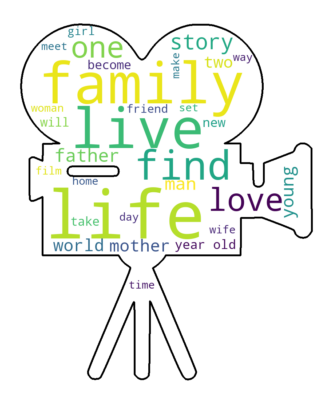

In [16]:
# Use of masks like the image below to make the word cloud more interesting:
text = main_dataset[main_dataset.Drama_genre==1].story.tolist()
text = ''.join(text)
wc = WordCloud(stopwords = STOPWORDS).generate(text)

mask = np.array(Image.open('movie_img.png'))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

mask=np.where(mask > 3, 255, mask)
    
wc = WordCloud(background_color="white", max_words=30, mask=mask, stopwords=STOPWORDS, contour_width=5,contour_color='black')
wc.generate(text)

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

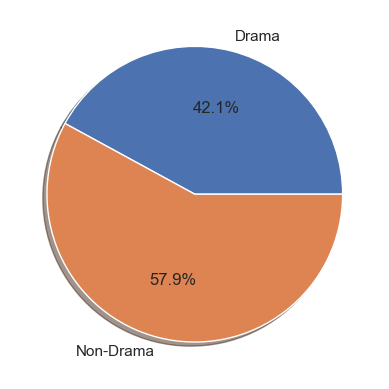

In [17]:
# To visualize the genre distribution
yes_drama = len(main_dataset[main_dataset['Drama_genre']==1])
no_drama = len(main_dataset[main_dataset['Drama_genre']==0])
sizes = [yes_drama,no_drama]
labels = ['Drama','Non-Drama']

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,shadow=True,autopct='%1.1f%%')
plt.show()

<h1 align='Left' style="color: black;">Model training & Outcome:</h1>

All of the models/supervised learning techniques documented below were built with similar hyper - parameter, allowing us to easily determine the best model among all others.

<h1 align='Left' style="color: black;">1. Logistic Regression Model:</h1>

Logistic regression is essentially a supervised classification algorithm. In a classification problem, the target variable (or output), y, can only have discrete values for a given set of features (or inputs), X. To determine the best parameter, we have used param grid, cross validation, and GridSearchCV and achieved accuracy rate was 64.6%.

Best Parameter: {'solver': 'newton-cg'}
Best Cross Validation Score: 0.6471428571428571

Best In sample accuracy: 96.88571428571429
Best Out-of-sample accuracy: 64.60000000000001

Confusion Matrix:
[[2553  923]
 [1201 1323]]


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71      3476
           1       0.59      0.52      0.55      2524

    accuracy                           0.65      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.64      0.65      0.64      6000



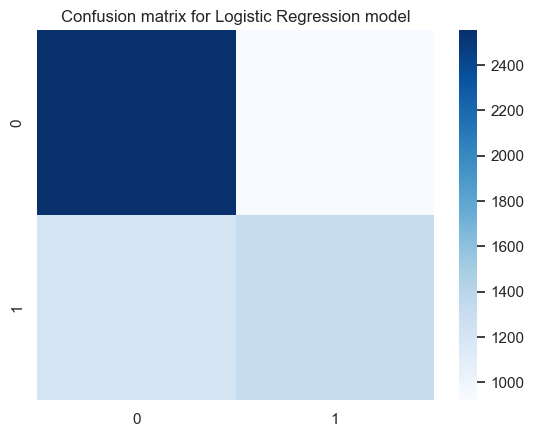

In [18]:
# creating object of logistic model
model_LR = LogisticRegression(random_state=0, max_iter=1000)

#setting hyper parameters & performing grid search along with cross validation
param_grid = {'solver':['newton-cg','lbfgs','liblinear']}  
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid1 = GridSearchCV(model_LR, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid1.fit(X_train, y_train)

#generating & displaying best perameters, accuracy, classification report & confusion matrix
LR_bestModel = grid1.best_estimator_
best_y_train_LR = LR_bestModel.predict(X_train)
best_y_test_LR = LR_bestModel.predict(X_test)

lr_cf_matrix = confusion_matrix(y_test, best_y_test_LR)       

print("Best Parameter: {}".format(grid1.best_params_))
print("Best Cross Validation Score: {}".format(grid1.best_score_))
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_LR, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_LR, normalize = True) * 100)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_LR))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_LR))

cm_LR = pd.DataFrame(lr_cf_matrix)
sns.heatmap(cm_LR, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Logistic Regression model')
plt.show()

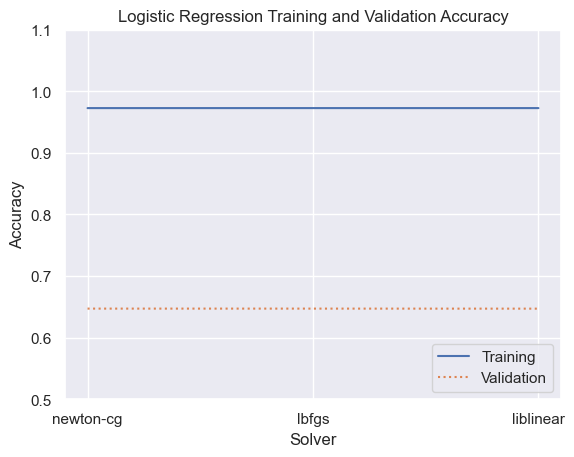

In [19]:
#creating train vs validation graph
grid1_train_scores = grid1.cv_results_['mean_train_score']
grid1_test_scores = grid1.cv_results_['mean_test_score']
solver = ['newton-cg','lbfgs','liblinear']

plt.plot(solver,grid1_train_scores,'-',label='Training')
plt.plot(solver,grid1_test_scores,':',label='Validation')
plt.title('Logistic Regression Training and Validation Accuracy')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(.5,1.1)
plt.legend(loc='lower right')
plt.plot();

<h1 align='Left' style="color: black;">2. Decision Tree Model:</h1>

The decision tree algorithm is an example of supervised learning. They can be used to solve both regression and classification problems. It solves the problem using the tree representation, where each node corresponds to a class label and attributes are represented on the internal node of the tree. To determine the best parameter, we used param grid, cross validation, and GridSearchCV which lead to achieve accuracy rate of 61.33%.

Best Parameter: {'max_depth': 13}
Best Cross Validation Score: 0.6144285714285715

Best In sample accuracy: 65.08571428571429
Best Out-of-sample accuracy: 61.33333333333333

Confusion Matrix:
[[2523  953]
 [1367 1157]]


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      3476
           1       0.55      0.46      0.50      2524

    accuracy                           0.61      6000
   macro avg       0.60      0.59      0.59      6000
weighted avg       0.61      0.61      0.61      6000



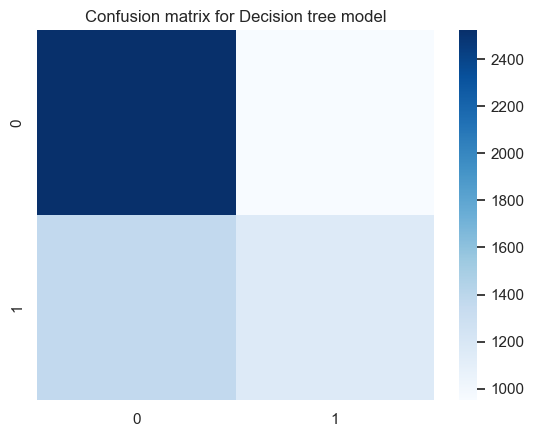

In [43]:
# creating object of decision tree model
model_DT = DecisionTreeClassifier(class_weight = "balanced", splitter = 'best')

#setting hyper parameters & performing grid search along with cross validation
param_grid = {'max_depth': [5, 7, 9, 11, 13]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid2 = GridSearchCV(model_DT, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid2.fit(X_train, y_train)

#generating & displaying best perameters, accuracy, classification report & confusion matrix
DT_bestModel = grid2.best_estimator_
best_y_train_DT = DT_bestModel.predict(X_train)
best_y_test_DT = DT_bestModel.predict(X_test)

dt_cf_matrix = confusion_matrix(y_test, best_y_test_DT)              

print("Best Parameter: {}".format(grid2.best_params_))
print("Best Cross Validation Score: {}".format(grid2.best_score_))
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_DT, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_DT, normalize = True) * 100)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_DT))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_DT))

cm_DT = pd.DataFrame(dt_cf_matrix)
sns.heatmap(cm_DT, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Decision tree model')
plt.show()

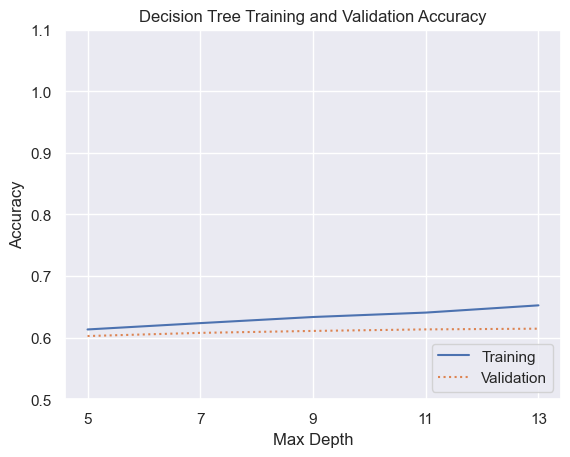

In [44]:
#creating train vs validation graph
grid2_train_scores = grid2.cv_results_['mean_train_score']
grid2_test_scores = grid2.cv_results_['mean_test_score']
depth = [5,7,9,11,13]

plt.plot(depth,grid2_train_scores,'-',label='Training')
plt.plot(depth,grid2_test_scores,':',label='Validation')
plt.title('Decision Tree Training and Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim(0.5,1.1)
plt.xticks([5,7,9,11,13])
plt.legend(loc='lower right')
plt.plot();

<h1 align='Left' style="color: black;">3. Random Forest Model:</h1>

Random Forest is an ensemble technique which could perform both regression and classification tasks by incorporating multiple decision trees and a technique known as Bootstrap and Aggregation, furthermore known as bagging. The basic idea is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. To determine the best parameter, we used param grid, cross validation, and GridSearchCV. Our accuracy rate was 58.4%.

Best Parameter: {'max_depth': 13, 'n_estimators': 30}
Best Cross Vlidation Score: 0.5824285714285715

Best In sample accuracy: 59.22142857142857
Best Out-of-sample accuracy: 58.43333333333334

Confusion Matrix:
[[3462   14]
 [2480   44]]


Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      3476
           1       0.76      0.02      0.03      2524

    accuracy                           0.58      6000
   macro avg       0.67      0.51      0.38      6000
weighted avg       0.66      0.58      0.44      6000



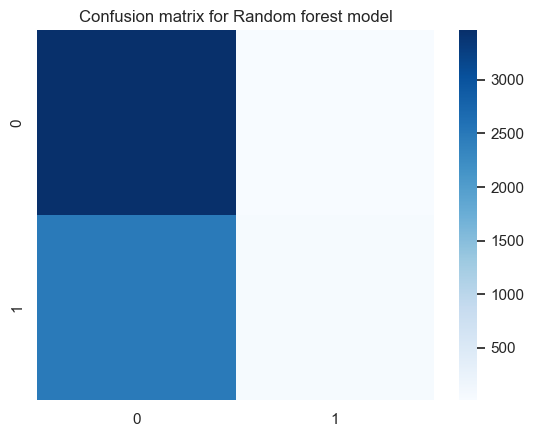

In [22]:
# creating object of random forest model
model_RF = RandomForestClassifier()

#setting hyper parameters & performing grid search along with cross validation
param_grid = {'n_estimators' : [30,50,70,90,110,130,150], 'max_depth' : [5,7,9,11,13]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid3 = GridSearchCV(model_RF, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid3.fit(X_train, y_train)

#generating & displaying best perameters, accuracy, classification report & confusion matrix
RF_bestModel = grid3.best_estimator_
best_y_train_RF = RF_bestModel.predict(X_train)
best_y_test_RF = RF_bestModel.predict(X_test)

rf_cf_matrix = confusion_matrix(y_test, best_y_test_RF)           

print("Best Parameter: {}".format(grid3.best_params_))
print("Best Cross Vlidation Score: {}".format(grid3.best_score_))
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_RF, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_RF, normalize = True) * 100)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_RF))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_RF))

cm_RF = pd.DataFrame(rf_cf_matrix)
sns.heatmap(cm_RF, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Random forest model')
plt.show()

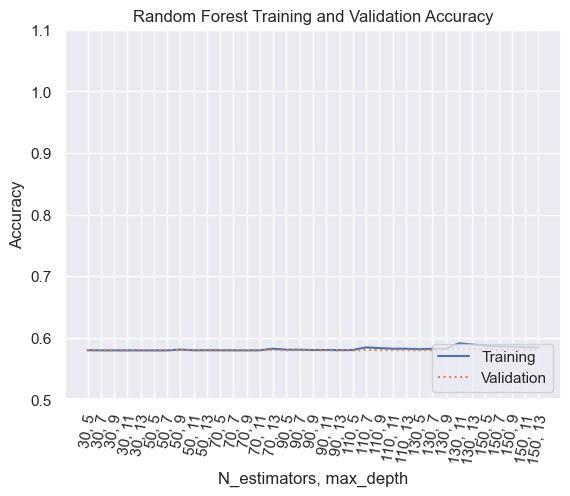

In [31]:
#creating train vs validation graph
grid3_train_scores = grid3.cv_results_['mean_train_score']
grid3_test_scores = grid3.cv_results_['mean_test_score']
rfx = range(1,36)

plt.plot(rfx,grid3_train_scores,'-',label='Training')
plt.plot(rfx,grid3_test_scores,':',label='Validation')
plt.title('Random Forest Training and Validation Accuracy')
plt.xlabel('N_estimators, max_depth')
plt.ylabel('Accuracy')
plt.ylim(0.5,1.1)
plt.xticks(ticks=rfx,labels=['30, 5','30, 7','30, 9','30, 11', '30, 13','50, 5','50, 7','50, 9','50, 11', '50, 13',
                             '70, 5','70, 7','70, 9','70, 11', '70, 13','90, 5','90, 7','90, 9','90, 11', '90, 13',
                             '110, 5','110, 7','110, 9','110, 11', '110, 13','130, 5','130, 7','130, 9','130, 11', '130, 13',
                            '150, 5','150, 7','150, 9','150, 11', '150, 13'],rotation=80)
plt.legend(loc='lower right')
plt.plot();

<h1 align='Left' style="color: black;">4. K-Nearest Neighbor Model:</h1>

The supervised machine learning algorithm k-nearest neighbor is used to solve classification and regression problems. The nearest annotated data point, also known as the nearest neighbor, is used to classify a data point in KNN. We used param grid, cross validation, and GridSearchCV techniques to find the best parameter. The accuracy rate was 58.68%.

Best Parameter: {'n_neighbors': 3}
Best Cross Validation Score: 0.5849285714285715

Best In sample accuracy: 74.94285714285715
Best Out-of-sample accuracy: 58.68333333333333

Confusion Matrix:
[[2863  613]
 [1866  658]]


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      3476
           1       0.52      0.26      0.35      2524

    accuracy                           0.59      6000
   macro avg       0.56      0.54      0.52      6000
weighted avg       0.57      0.59      0.55      6000



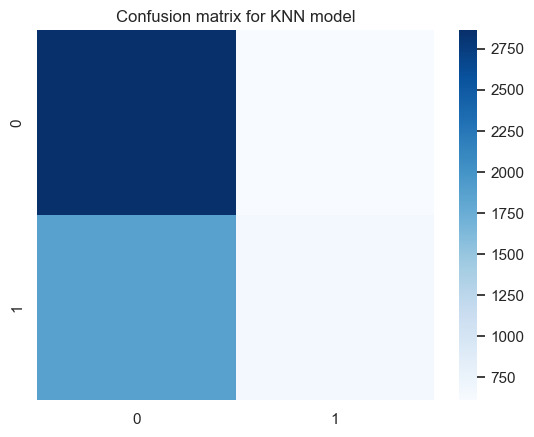

In [25]:
# creating object of KNN model
import warnings
warnings.filterwarnings('ignore')

model_KNN = KNeighborsClassifier()  

#setting hyper parameters & performing grid search along with cross validation
param_grid = {'n_neighbors': [3,5,7,9,11,13,15]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid4 = GridSearchCV(model_KNN, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid4.fit(X_train, y_train)

#generating & displaying best perameters, accuracy, classification report & confusion matrix
KNN_bestModel = grid4.best_estimator_
best_y_train_KNN = KNN_bestModel.predict(X_train)
best_y_test_KNN = KNN_bestModel.predict(X_test)

knn_cf_matrix = confusion_matrix(y_test, best_y_test_KNN)            

print("Best Parameter: {}".format(grid4.best_params_))
print("Best Cross Validation Score: {}".format(grid4.best_score_))
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_KNN, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_KNN, normalize = True) * 100)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_KNN))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_KNN))

cm_KNN = pd.DataFrame(knn_cf_matrix)
sns.heatmap(cm_KNN, annot = False, cmap = "Blues")
plt.title('Confusion matrix for KNN model')
plt.show()

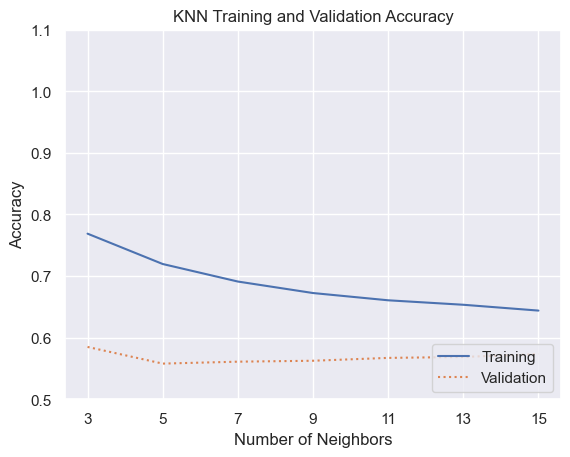

In [32]:
#creating train vs validation graph
grid4_train_scores = grid4.cv_results_['mean_train_score']
grid4_test_scores = grid4.cv_results_['mean_test_score']
neighbors = [3,5,7,9,11,13,15]

plt.plot(neighbors,grid4_train_scores,'-',label='Training')
plt.plot(neighbors,grid4_test_scores,':',label='Validation')
plt.title('KNN Training and Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks([3,5,7,9,11,13,15])
plt.ylim(0.5,1.1)
plt.legend(loc='lower right')
plt.plot();

<h1 align='Left' style="color: black;">5. Gaussian Naive Model:</h1>

This algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is mainly used in text classification that includes a high-dimensional training dataset. We have used param_grid, cross validation and GridSearchCV to find out the best parameter achieving the accuracy of 57.33%.
We also tried to plug in some more parameter to param_grid{} but due to hardware limitation we coudn't run it.

Best Parameter: {}
Best Cross Validation Score: 0.5765714285714286

Best In sample accuracy: 89.84285714285714
Best Out-of-sample accuracy: 57.333333333333336

Confusion Matrix:
[[1936 1540]
 [1020 1504]]


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      3476
           1       0.49      0.60      0.54      2524

    accuracy                           0.57      6000
   macro avg       0.57      0.58      0.57      6000
weighted avg       0.59      0.57      0.58      6000



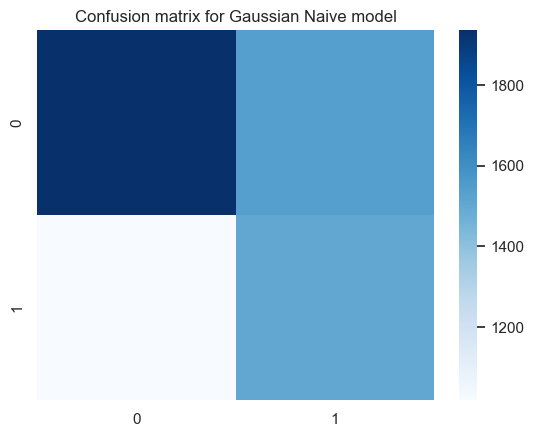

In [27]:
# creating object of Gaussian naive model
model_GN = GaussianNB()
a_train = X_train.toarray()
a_test = X_test.toarray()

#setting hyper parameters & performing grid search along with cross validation
param_grid = {}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid5 = GridSearchCV(model_GN, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True,error_score='raise')
grid5.fit(a_train, y_train)

#generating & displaying best perameters, accuracy, classification report & confusion matrix
GN_bestModel = grid5.best_estimator_
best_y_train_GN = GN_bestModel.predict(a_train)
best_y_test_GN = GN_bestModel.predict(a_test)

gn_cf_matrix = confusion_matrix(y_test, best_y_test_GN)                

print("Best Parameter: {}".format(grid5.best_params_))
print("Best Cross Validation Score: {}".format(grid5.best_score_))
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_GN, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_GN, normalize = True) * 100)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_GN))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_GN))

cm_GN = pd.DataFrame(gn_cf_matrix)
sns.heatmap(cm_GN, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Gaussian Naive model')
plt.show()

In [ ]:
#creating train vs validation graph
grid5_train_scores = grid5.cv_results_['mean_train_score']
grid5_test_scores = grid5.cv_results_['mean_test_score']

plt.plot(grid5_train_scores,'-',label='Training')
plt.plot(grid5_test_scores,':',label='Validation')
plt.title('Gaussian Naive Bayes Training and Validation Accuracy')
plt.xlabel('Variance Smoothing')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.plot();

<h1 align='Left' style="color: black;">6. AdaBoost Model:</h1>

Adaboost algorithms boost prediction power by transforming a large number of weak learners into strong learners. The basic idea behind boosting algorithms is that we build a model on the training dataset first, then build a second model to correct the errors in the first model. This procedure is repeated until the errors are minimized and the dataset is correctly predicted. To find the best parameter, we used param grid, cross validation, and GridSearchCV. The accuracy rate was 58.5%.

Best Parameter: {'learning_rate': 0.01, 'n_estimators': 101}
Best Cross Validation Score: 0.5839285714285716

Best In sample accuracy: 58.707142857142856
Best Out-of-sample accuracy: 58.5

Confusion Matrix:
[[3456   20]
 [2470   54]]


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.99      0.74      3476
           1       0.73      0.02      0.04      2524

    accuracy                           0.58      6000
   macro avg       0.66      0.51      0.39      6000
weighted avg       0.64      0.58      0.44      6000



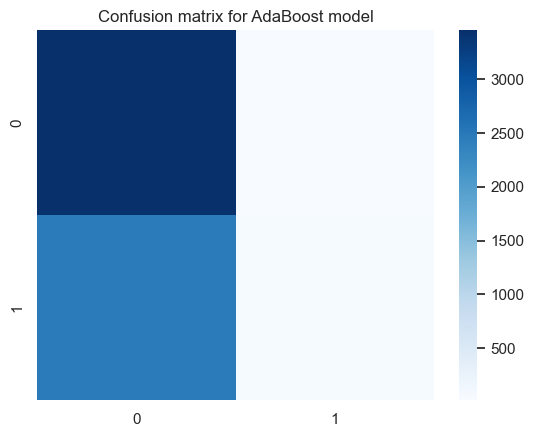

In [29]:
# creating object of AdaBoost model
model_Ada = AdaBoostClassifier()

#setting hyper parameters & performing grid search along with cross validation
grid6 = dict()
grid6['n_estimators'] = [11, 53, 101]
grid6['learning_rate'] = [0.001, 0.01]
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid6 = GridSearchCV(model_Ada, grid6, cv = cv, scoring='accuracy', return_train_score = True)
grid6.fit(X_train, y_train)

#generating & displaying best perameters, accuracy, classification report & confusion matrix
Ada_bestModel = grid6.best_estimator_
best_y_train_Ada = Ada_bestModel.predict(X_train)
best_y_test_Ada = Ada_bestModel.predict(X_test)

ada_cf_matrix = confusion_matrix(y_test, best_y_test_Ada)

print ("Best Parameter: {}".format(grid6.best_params_))
print ("Best Cross Validation Score: {}".format(grid6.best_score_))
print ()
print ("Best In sample accuracy:", accuracy_score(y_train, best_y_train_Ada, normalize = True) * 100)
print ("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_Ada, normalize = True) * 100)
print ()
print ("Confusion Matrix:")
print (confusion_matrix(y_test, best_y_test_Ada))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_Ada))

cm_GN = pd.DataFrame(ada_cf_matrix)
sns.heatmap(cm_GN, annot = False, cmap = "Blues")
plt.title('Confusion matrix for AdaBoost model')
plt.show()

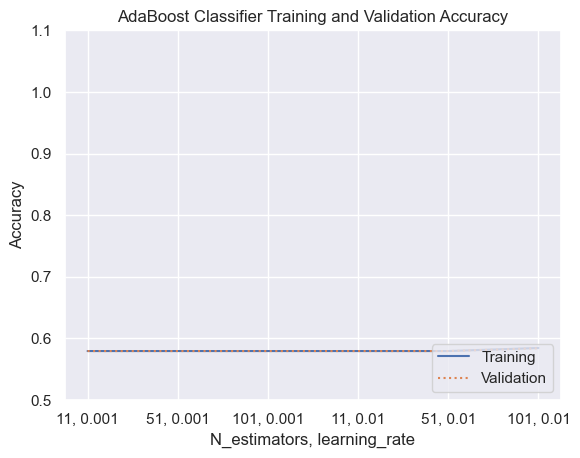

In [46]:
#creating train vs validation graph
grid6_train_scores = grid6.cv_results_['mean_train_score']
grid6_test_scores = grid6.cv_results_['mean_test_score']
abcx = [1,2,3,4,5,6]

plt.plot(abcx,grid6_train_scores,'-',label='Training')
plt.plot(abcx,grid6_test_scores,':',label='Validation')
plt.title('AdaBoost Classifier Training and Validation Accuracy')
plt.xlabel('N_estimators, learning_rate')
plt.ylabel('Accuracy')
plt.xticks(ticks=abcx,labels=['11, 0.001','51, 0.001','101, 0.001','11, 0.01','51, 0.01','101, 0.01'])
plt.ylim(0.5,1.1)
plt.legend(loc='lower right')
plt.plot();

<h1 align='Left' style="color: black;">7. Neural Network Model:</h1>

This neural network applies vectorization within the model using TextVectorization, so CountVectorizer is not needed. The embedding layer converts the input text into vectors of fixed size. The flatten layer reshapes the data, which is then put through 5 dense (hidden) layers, in which neurons are deeply connected to each of the previous layer's neurons. When compiling, this model uses the 'adam' optimizer, which is a lite version of Stochastic Gradient Descent (SGD) which converges faster, binary crossentropy as a loss function, the most common used when dealing with binary classifications, and measures model performance via accuracy. X_train and X_test are adapted so as to fit the input layer.

In [26]:
#splitting dataset for neural net model
X = main_dataset['story']
y = main_dataset['Drama_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify=y)

# creating object of neural network model
model = Sequential()

#setting hyper parameters & performing TextVectorization, flattening, compiling and doing epoch to get the accuracy scores
model.add(InputLayer(input_shape=(1,),dtype=tf.string))
model.add(TextVectorization(ngrams=(1,3),max_tokens=50000,output_sequence_length=100))
model.add(Embedding(50000,64,input_length=100))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

model.layers[0].adapt(X_train)
model.layers[0].adapt(X_test)

In [27]:
nn = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
469/469 [==============================] - 27s 53ms/step - loss: 0.6448 - accuracy: 0.6215 - val_loss: 0.6171 - val_accuracy: 0.6592
Epoch 2/5
469/469 [==============================] - 26s 55ms/step - loss: 0.3377 - accuracy: 0.8451 - val_loss: 0.9329 - val_accuracy: 0.6196
Epoch 3/5
469/469 [==============================] - 29s 61ms/step - loss: 0.0642 - accuracy: 0.9719 - val_loss: 1.4696 - val_accuracy: 0.6090
Epoch 4/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0313 - accuracy: 0.9851 - val_loss: 1.9635 - val_accuracy: 0.6040
Epoch 5/5
469/469 [==============================] - 27s 58ms/step - loss: 0.0255 - accuracy: 0.9863 - val_loss: 1.9809 - val_accuracy: 0.5980


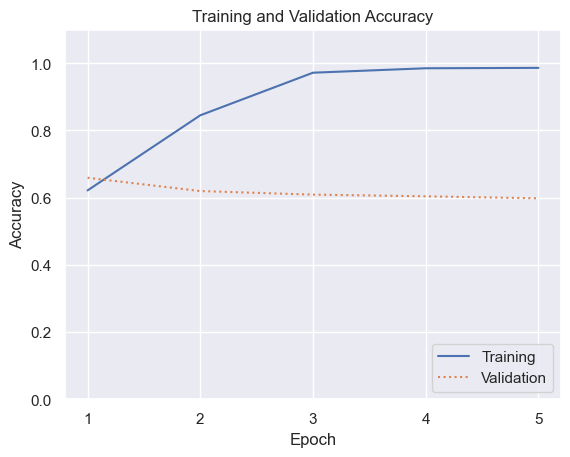

In [28]:
#creating train vs validation graph
sns.set()
 
acc = nn.history['accuracy']
val = nn.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training')
plt.plot(epochs, val, ':', label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xticks([1,2,3,4,5])
plt.ylim(0,1.1)
plt.plot();

The use of Stochastic Gradient Descent (SGD) as the model's optimizer has resulted in decreased validation accuracy scores in comparison to the 'adam' optimizer, despite SGD being the fuller version of 'adam'.

157/157 [==============================] - 1s 4ms/step

[[1999  898]
 [1112  991]]

              precision    recall  f1-score   support

           0       0.64      0.69      0.67      2897
           1       0.52      0.47      0.50      2103

    accuracy                           0.60      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.59      0.60      0.59      5000



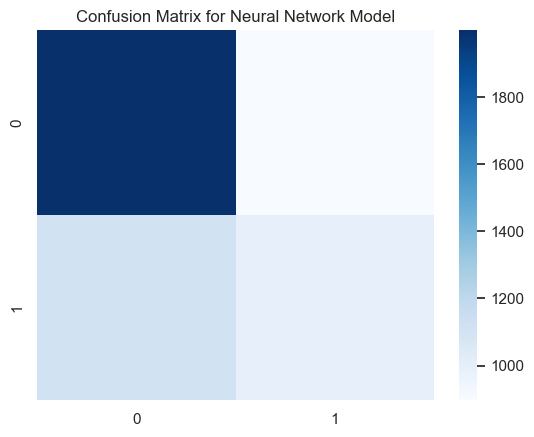

In [29]:
#generating & displaying classification report & confusion matrix
y_test_hat = model.predict(X_test)
y_test_hat = np.reshape(y_test_hat,(5000))
y_test_hat = np.where(y_test_hat > 0.5, 1, 0)

print()
nn_matrix = confusion_matrix(y_test, y_test_hat)
print(nn_matrix)
print()
print(classification_report(y_test,y_test_hat))

cm_nn = pd.DataFrame(nn_matrix)
sns.heatmap(cm_nn, annot = False, cmap = "Blues")
plt.title('Confusion Matrix for Neural Network Model')
plt.show()

The best of the seven models was logistic regression, so this model will be retrained using all of the original student dataset and used to predict when movies from the evaluation dataset are dramas.

<h1 align='Left' style="color: black;">Movie Prediction:</h1><b>(using optimal model)</b>

Here, we would be predicting the movies using the Logistic Regression model as it did better among all the models developed above. Prior testing the evaluation dataset we will perform the data cleaning, preprocessing & transfomration using the same techniques that were implied for previous two dataset files.

In [62]:
#creating dataframe for evaluation dataset and performing the data cleaning, preprocessing & transfomration as done for other two datasets
merge_df = evaldf.merge(moviedf, left_on = 'movie_id', right_on = 'movieId')
merge_df['Drama_genre'] = merge_df['genres'].apply(find_genre)
merge_df['Drama_genre'] = merge_df.Drama_genre.map({'Drama':1, 'No Drama':0})
merge_df['story'] = merge_df['story'].apply(text_clean)
evaluation_dataset = merge_df[[ 'movie_id', 'story', 'Drama_genre']]

In [63]:
evaluation_dataset

,movie_id,story,Drama_genre
0,122349,growing up in the mission district of san fran...,1
1,122351,a soldier returns home from the iraq war only ...,0
2,122361,marco the monkey works as a beach officer but ...,0
3,187901,when an honest cop vijay kumar family is ruthl...,0
4,187903,kathiresan aka kaththi a criminal escapes from...,1
...,...,...,...
3493,131062,in the middle of nowhere 20 years after an apo...,1
3494,131064,after living for years as a struggling artist ...,0
3495,131066,ronal is a young barbarian with low self - est...,0
3496,131068,ziege h,0


In [49]:
text_eval = evaluation_dataset.story
y_eval = evaluation_dataset.Drama_genre

vect = CountVectorizer(stop_words = "english",max_features=50000,ngram_range=(1,3))           
vect.fit(text_eval)
X_eval = vect.transform(text_eval)

In [64]:
LR_bestModel.fit(bag_of_words,y);
merge_df['Drama_genre'].value_counts()

0    2075
1    1423
Name: Drama_genre, dtype: int64

Prediction accuracy: 53.687821612349914

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63      2075
           1       0.42      0.35      0.38      1423

    accuracy                           0.54      3498
   macro avg       0.51      0.51      0.50      3498
weighted avg       0.52      0.54      0.53      3498

Confusion Matrix:
[[1383  692]
 [ 928  495]]


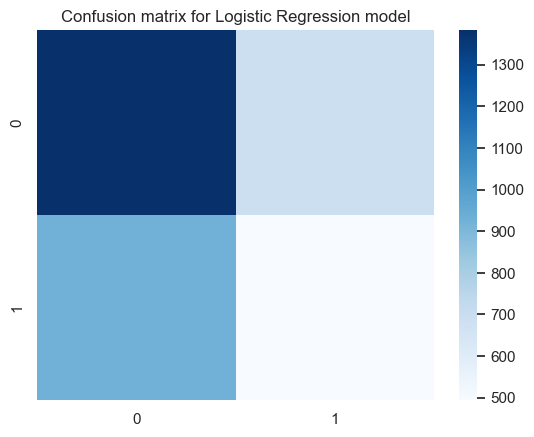

In [71]:
#generating & displaying accuracy scores, classification report & confusion matrix
y_hat_eval = LR_bestModel.predict(X_eval)

print("Prediction accuracy:",accuracy_score(y_eval, y_hat_eval, normalize = True) * 100)
print()
print('Classification Report:\n', classification_report(y_eval,y_hat_eval))

print("Confusion Matrix:")
print(confusion_matrix(y_eval, y_hat_eval))

oplr_cf_matrix = confusion_matrix(y_eval, y_hat_eval)

cm_LR = pd.DataFrame(oplr_cf_matrix)
sns.heatmap(cm_LR, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Logistic Regression model')
plt.show()

From the prediction outcome generated we can see that we are more efficiently able to predict the no drama genre movies while drama genre movies are only 495 and overall accuracy achieved with the full evaluation dataset is 53.68%.